### Refazer a aula 7 com vstack das amostras

In [1]:
%matplotlib inline
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
# Carregando amostras de treino
filename_class = 'sounds/classical.00012.wav'
filename_hip = 'sounds/hiphop.00012.wav'
x_classic, sr_classic = librosa.load(filename_class, duration=30)
x_hiphop, sr_hiphop = librosa.load(filename_hip, duration=30)
ipd.Audio(x_classic, rate=sr_hiphop)
ipd.Audio(x_hiphop, rate=sr_classic)

<ipython-input-3-d9ea7b612929>:4: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(x_classic, sr_classic)


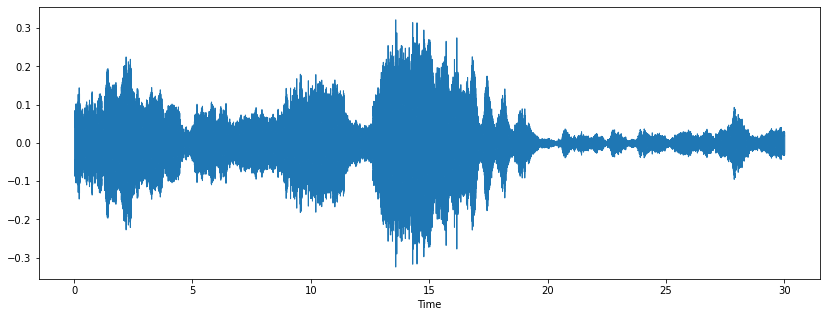

In [3]:
# Display do espectro por tempo da música clássica
import librosa.display 
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x_classic, sr_classic)
plt.show()

<ipython-input-4-1872f85709b4>:3: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(x_hiphop, sr_hiphop)


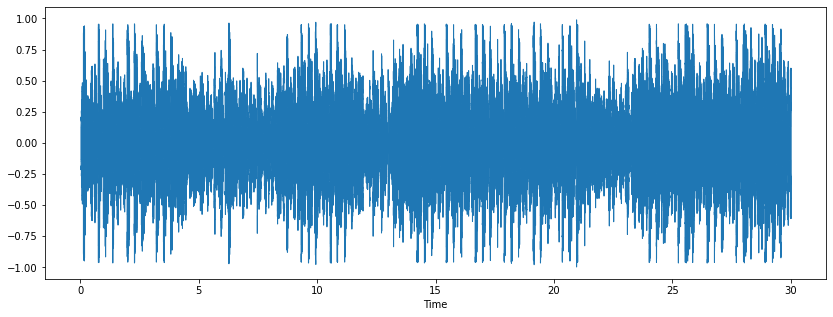

In [4]:
# Espectro do hiphop
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x_hiphop, sr_hiphop)
plt.show()

### Criando o dataset com vstack, com fit transform após vstack

In [55]:
n_mfcc = 12
mfcc_classic = librosa.feature.mfcc(x_classic, sr=sr_classic, n_mfcc=n_mfcc).T
mfcc_hiphop = librosa.feature.mfcc(x_hiphop, sr=sr_hiphop, n_mfcc=n_mfcc).T

# vstack
features = numpy.vstack((mfcc_classic, mfcc_hiphop))
labels = numpy.concatenate((numpy.zeros(len(mfcc_classic)), numpy.ones(len(mfcc_hiphop))))

# Escalar de hip hop e aplicar o mesmo para o clássico
scaler = StandardScaler()
mfcc_scaled = scaler.fit_transform(features)

<ipython-input-55-9653fcd8c548>:3: FutureWarning: Pass y=[-0.03338623 -0.04043579 -0.02340698 ... -0.01211548 -0.01080322
 -0.00561523] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_classic = librosa.feature.mfcc(x_classic, sr=sr_classic, n_mfcc=n_mfcc).T
<ipython-input-55-9653fcd8c548>:4: FutureWarning: Pass y=[-0.05737305 -0.10018921 -0.05282593 ...  0.11334229  0.10574341
  0.12380981] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_hiphop = librosa.feature.mfcc(x_hiphop, sr=sr_hiphop, n_mfcc=n_mfcc).T


In [54]:
features.shape

(2584, 12)

In [56]:
mfcc_scaled.shape

(2584, 12)

In [57]:
labels.shape

(2584,)

In [58]:
model = SVC()
model.fit(mfcc_scaled, labels)

SVC()

In [59]:
# Amostras de teste
classic_filetest = 'sounds/classical.00024.wav'
hiphop_filetest = 'sounds/hiphop.00024.wav'

# Carregando e aplicando a feature mfcc
x_classic_test, sr_classic = librosa.load(classic_filetest, duration=60)
x_hiphop_test, sr_hiphop = librosa.load(hiphop_filetest, duration=60)
mfcc_classic_test = librosa.feature.mfcc(x_classic_test, sr=sr_classic, n_mfcc=n_mfcc).T
mfcc_hiphop_test = librosa.feature.mfcc(x_hiphop_test, sr=sr_hiphop, n_mfcc=n_mfcc).T

# Transformando na escala fitada nos dados de treino
mfcc_classic_test_scaled = scaler.transform(mfcc_classic_test)
mfcc_hiphop_test_scaled = scaler.transform(mfcc_hiphop_test)

<ipython-input-59-671dfc07ba76>:8: FutureWarning: Pass y=[-0.03775024 -0.07223511 -0.08242798 ...  0.02264404  0.00308228
 -0.0105896 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_classic_test = librosa.feature.mfcc(x_classic_test, sr=sr_classic, n_mfcc=n_mfcc).T
<ipython-input-59-671dfc07ba76>:9: FutureWarning: Pass y=[-0.37893677 -0.6002197  -0.5111084  ... -0.01242065 -0.01599121
 -0.01571655] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_hiphop_test = librosa.feature.mfcc(x_hiphop_test, sr=sr_hiphop, n_mfcc=n_mfcc).T


In [60]:
predicted_labels_classic = model.predict(mfcc_classic_test_scaled)
unique_labels_classic, unique_counts_classic = numpy.unique(predicted_labels_classic, return_counts=True)

In [61]:
import pandas as pd

pd_unique_labels_classic = pd.DataFrame(predicted_labels_classic)
pd_unique_labels_classic.value_counts(normalize = True)

0.0    0.823666
1.0    0.176334
dtype: float64

In [62]:
# numpy.argmax(<array>) : retorna o índice na qual o valor de <array> é máximo
unique_labels_classic[numpy.argmax(unique_counts_classic)]

0.0

In [63]:
predicted_labels_hiphop = model.predict(mfcc_hiphop_test_scaled)
unique_labels_hiphop, unique_counts_hiphop = numpy.unique(predicted_labels_hiphop, return_counts=True)

In [64]:
import pandas as pd

pd_unique_labels_hiphop = pd.DataFrame(predicted_labels_hiphop)
pd_unique_labels_hiphop.value_counts(normalize = True)

1.0    0.990719
0.0    0.009281
dtype: float64

In [65]:
unique_labels_hiphop[numpy.argmax(unique_counts_hiphop)]

1.0

In [68]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

def metricas_classificacao(estimator, X_train, X_test, y_train, y_test):
    
    # ============================================

    print("\nMétricas de avaliação de treino:")

    y_pred_train = estimator.predict(X_train)

    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()

    print(classification_report(y_train, y_pred_train))

    # ============================================

    print("\nMétricas de avaliação de teste:")

    y_pred_test = estimator.predict(X_test)

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()

    print(classification_report(y_test, y_pred_test))

    # ============================================

    #f1_score_weighted = f1_score(y_test, y_pred_test, average='weighted')
    #print(f"F1-score weighted: {100*f1_score_weighted:.2f}")
    #return f1_score_weighted



Métricas de avaliação de treino:


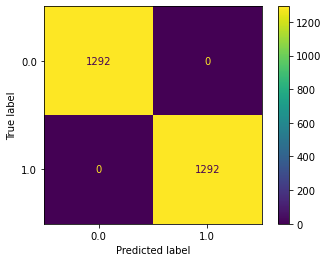

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1292
         1.0       1.00      1.00      1.00      1292

    accuracy                           1.00      2584
   macro avg       1.00      1.00      1.00      2584
weighted avg       1.00      1.00      1.00      2584


Métricas de avaliação de teste:


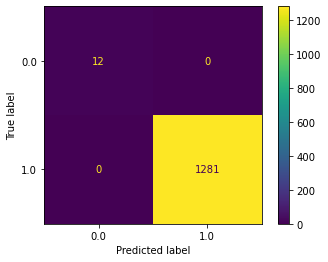

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00      1281

    accuracy                           1.00      1293
   macro avg       1.00      1.00      1.00      1293
weighted avg       1.00      1.00      1.00      1293



In [70]:
metricas_classificacao(model, mfcc_scaled, mfcc_hiphop_test_scaled, labels, predicted_labels_hiphop)


Métricas de avaliação de treino:


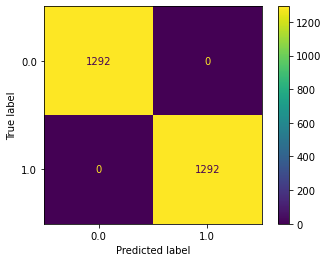

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1292
         1.0       1.00      1.00      1.00      1292

    accuracy                           1.00      2584
   macro avg       1.00      1.00      1.00      2584
weighted avg       1.00      1.00      1.00      2584


Métricas de avaliação de teste:


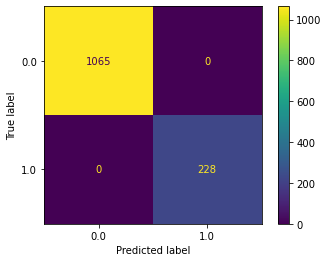

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1065
         1.0       1.00      1.00      1.00       228

    accuracy                           1.00      1293
   macro avg       1.00      1.00      1.00      1293
weighted avg       1.00      1.00      1.00      1293



In [71]:
metricas_classificacao(model, mfcc_scaled, mfcc_classic_test_scaled, labels, predicted_labels_classic)